In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data1 = pd.read_csv('churn_clustered.csv')
data1.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Means_clust,PAM_clust
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,0,0,0,1,0,0,0,1,1,0
1,1.0,9.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,1,1,0,0,1,0,0,1,0,1
2,1.0,9.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,0,1,0,0,1,0,0,1,0,1
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,0,1,0,1,0,0,0,1,1,0
4,1.0,0.0,1.0,12.0,3.0,3.0,5.0,3.0,0.0,11.0,...,0,1,0,0,1,0,0,1,0,1


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
X = data1.drop('Churn', axis=1)
y = data1['Churn']

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.73795855,  1.46977096, -1.17879509, ...,  1.46107627,
         0.7727633 , -0.90404728],
       [-0.1348657 , -0.71528595, -0.93153381, ...,  1.46107627,
        -1.29405731,  1.10613684],
       [-0.1348657 , -0.71528595,  1.78834025, ...,  1.46107627,
        -1.29405731,  1.10613684],
       ...,
       [-1.09981425, -0.71528595, -0.56064189, ..., -0.68442697,
         0.7727633 , -0.90404728],
       [ 1.55379427,  1.46977096, -0.80790317, ..., -0.68442697,
         0.7727633 , -0.90404728],
       [-0.25548427, -0.71528595, -0.06611933, ..., -0.68442697,
         0.7727633 , -0.90404728]])

In [6]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
X_scaled.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop,PreferedOrderCat_Mobile,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single,K_Means_clust,PAM_clust
0,-0.737959,1.469771,-1.178795,0.092654,-0.67290,-0.772992,1.875626,1.584290,-1.304023,-0.411136,...,-0.472632,-1.227468,-0.280257,1.321492,-0.765451,-0.221808,-1.062709,1.461076,0.772763,-0.904047
1,-0.134866,-0.715286,-0.931534,0.092654,0.30375,-0.048392,1.092812,1.584290,-0.187486,-1.344668,...,2.115810,0.814685,-0.280257,-0.756720,1.306419,-0.221808,-1.062709,1.461076,-1.294057,1.106137
2,-0.134866,-0.715286,1.788340,-1.324850,0.30375,-0.048392,0.701405,1.584290,-0.466620,-1.344668,...,-0.472632,0.814685,-0.280257,-0.756720,1.306419,-0.221808,-1.062709,1.461076,-1.294057,1.106137
3,-1.220433,1.469771,-0.066119,-1.324850,0.30375,1.400807,1.484219,-0.631198,2.045589,-1.344668,...,-0.472632,0.814685,-0.280257,1.321492,-0.765451,-0.221808,-1.062709,1.461076,0.772763,-0.904047
4,-1.220433,-0.715286,-0.437011,0.092654,-0.67290,1.400807,-0.472817,-0.631198,-1.304023,-0.411136,...,-0.472632,0.814685,-0.280257,-0.756720,1.306419,-0.221808,-1.062709,1.461076,-1.294057,1.106137


In [7]:
x = X_scaled.copy(deep=True)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1, stratify=y)

In [9]:
# CART Model
mod7 = DecisionTreeClassifier(random_state=1, criterion='gini')

In [10]:
mod7.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [11]:
mod7.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [12]:
train_pred_mod7 = mod7.predict(x_train)
test_pred_mod7 = mod7.predict(x_test)

# classification matrix, confusion matrix, model score

In [13]:

def model_performance(model_name,
                      x_train_data,
                      y_train_data, 
                      train_preds,
                      x_test_data,
                      y_test_data,
                      test_preds):
    a = classification_report(y_train_data, train_preds)
    b = classification_report(y_test_data, test_preds)
    
    c = round(model_name.score(x_train_data, y_train_data),4)
    d = round(model_name.score(x_test_data, y_test_data),4)
    
    print('classification report for training data')
    print(a)
    print('\n')
    print('classification report for testing data')
    print(b)
    print('\n')
    print('the model score for training data is ',c)
    print('the model score for testing data is ',d)
    print('\n')
    
    
    from seaborn import heatmap
    fig, axes = plt.subplots(ncols=2)
    fig.set_size_inches(10,5)

    sns.heatmap(confusion_matrix(y_test_data, test_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Testing Data')
    plt.subplot(1,2,1)

    sns.heatmap(confusion_matrix(y_train_data, train_preds), annot=True, cbar=False, fmt='d')
    plt.xlabel('predicted labels')
    plt.ylabel('actual labels')
    plt.title('Confusion Matrix for Training Data')
    plt.subplot(1,2,2)

classification report for training data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3277
         1.0       1.00      1.00      1.00       664

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



classification report for testing data
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1405
         1.0       0.88      0.88      0.88       284

    accuracy                           0.96      1689
   macro avg       0.93      0.93      0.93      1689
weighted avg       0.96      0.96      0.96      1689



the model score for training data is  1.0
the model score for testing data is  0.9597




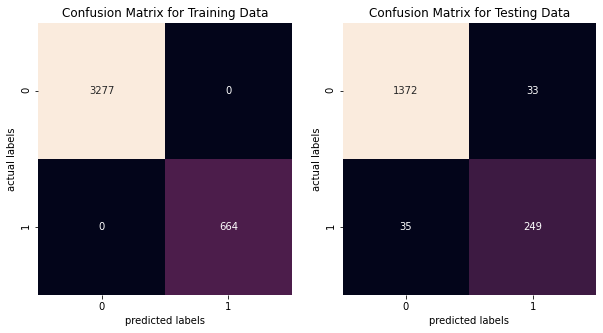

In [14]:
model_performance(mod7,x_train, y_train, train_pred_mod7,x_test,y_test, test_pred_mod7)

# AUC Score and ROC Curve Plotter

In [15]:
def roc_score_auc_curve(model_name,
                       x_train_data,
                       y_train_data, 
                       train_preds,
                       x_test_data,
                       y_test_data,
                       test_preds):
    a = round(roc_auc_score(y_train_data,model_name.predict_proba(x_train_data)[:,1]),4)
    b = round(roc_auc_score(y_test,model_name.predict_proba(x_test_data)[:,1]),4)
    print('AUC Score for Model on Training Data is',a)
    print('AUC Score for Model on Testing Data is',b)
    
    plt.figure(figsize=(12,7))
    
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train_data, model_name.predict_proba(x_train_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(train_fpr, train_tpr, marker='.') 
  

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test_data, model_name.predict_proba(x_test_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(test_fpr, test_tpr, marker='o')   

AUC Score for Model on Training Data is 1.0
AUC Score for Model on Testing Data is 0.9266


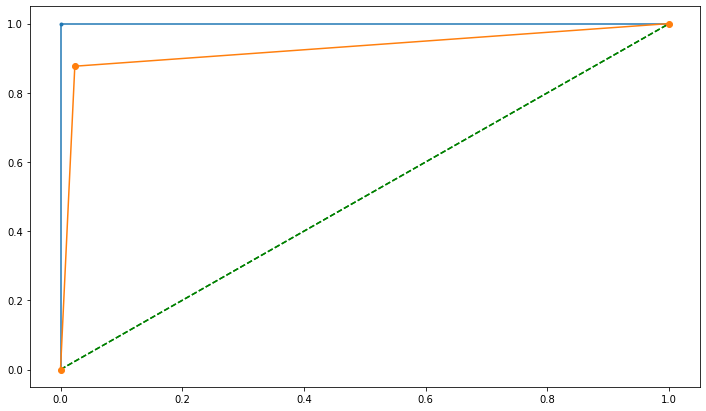

In [16]:
roc_score_auc_curve(mod7, x_train, y_train, train_pred_mod7, x_test, y_test, test_pred_mod7)

# ROC CURVE PLOTTER

In [17]:
def roc_curve_plotter(model_name,
                      x_data,
                      y_data):
    tpr, fpr, thresholds = roc_curve(y_data, model_name.predict_proba(x_data)[:,1])
    plt.plot([0,1],[0,1], linestyle='--', color='g')
    plt.plot(tpr, fpr, marker='.') 

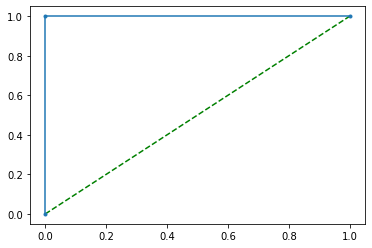

In [18]:
roc_curve_plotter(mod7, x_train, y_train)

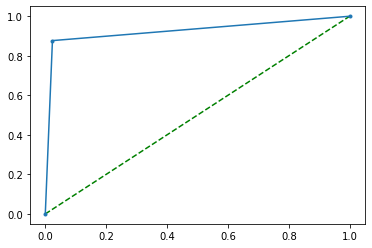

In [19]:
roc_curve_plotter(mod7, x_test, y_test)

# K-Fold Cross Validation Functions

In [93]:
def k_fold_cross_valscore(model_name,
                          x_train_data,
                          y_train_data,
                          folds
                         ):
    from sklearn.model_selection import cross_val_score
    import pandas as pd
    
    model_kfold_recall = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='recall', verbose=0)
    model_kfold_accuracy = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='accuracy', verbose=0)
    model_kfold_precision = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='precision', verbose=0)
    model_kfold_f1 = cross_val_score(model_name, x_train_data, y_train_data,cv=folds, scoring='f1', verbose=0)
    
    a = pd.DataFrame(model_kfold_recall)
    b = pd.DataFrame(model_kfold_accuracy)
    c = pd.DataFrame(model_kfold_precision)
    d = pd.DataFrame(model_kfold_f1)

    cross_val_data = pd.concat([a,b,c,d], ignore_index=True, axis=1)
    cross_val_data.rename(columns={0:"Recall", 1:"Accuracy", 2:"Precision",3:"F1 Score"},
                        inplace=True)
       
   
    print('\n')
    print("The mean recall for the model after " ,folds," folds is ", np.mean(model_kfold_recall))
    print("The mean accuracy for model after ",folds," folds is", np.mean(model_kfold_accuracy))
    print("the mean precision for the model after ",folds," folds is",np.mean(model_kfold_precision))
    print("the mean f1 score for the model after ",folds," folds is", np.mean(model_kfold_f1))
    print("\n")
    return cross_val_data
    

In [95]:
 k_fold_cross_valscore(mod7, x_train, y_train, folds=10)



The mean recall for the model after  10  folds is  0.8345092718227047
The mean accuracy for model after  10  folds is 0.937829467326351
the mean precision for the model after  10  folds is 0.8058362694755153
the mean f1 score for the model after  10  folds is 0.8190840722742563




,Recall,Accuracy,Precision,F1 Score
0,0.805970,0.951899,0.900000,0.850394
1,0.909091,0.949239,0.810811,0.857143
2,0.893939,0.944162,0.797297,0.842857
3,0.818182,0.921320,0.739726,0.776978
4,0.863636,0.949239,0.838235,0.850746
5,0.833333,0.944162,0.833333,0.833333
6,0.803030,0.928934,0.779412,0.791045
7,0.776119,0.918782,0.753623,0.764706
8,0.820896,0.936548,0.808824,0.814815
9,0.820896,0.934010,0.797101,0.808824
